## Data 602 - Final Project

Shoshana Farber

**Abtract:**

The world of movies is ever-evolving, with fresh releases hitting the scene week after week. Yet, not every film finds success, and some are deemed "flops" based on viewer reviews. This analysis aims to discover popular movies and to uncover patterns and insights related to movie popularity and ratings. The data, comprising 10,000 movies, includes features such as release year, rating, genre, certification, and critical production details. 

Exploratory data analysis (EDA) is employed to understand the distributions of variables such as rating, metascore, and gross revenue for movies, and to determine how to best “wrangle” the data. Further analysis is done to determine factors relating to high movie ratings. Some notable findings include romance movies as the top rated genre, followed closely by mystery, drama, and crime. A model was created using release year, movie length, votes, genre, and certification to predict movie ratings. The model accounted for about 47% of the variability in movie ratings and could be further improved with additional movie information. 

Additionally, the project introduces a basic recommender system based on IMDb's weighted rating formula and a content based recommender system using the movie description, genres, and other production information. Using these recommender systems, one could filter the data to come up with the top rated movies for their specifications or they can find similar movies to those they’ve enjoyed. 

**Introduction:**

The dataset selected for this project encompasses IMDb movies and their associated attributes, including release year, rating, genre, certification, and key production details such as director, stars, runtime, and more. IMDb is an internet movie database featuring information on thousands of movies, TV shows, video games, and more worldwide. From timeless classics to the latest releases, IMDb spans the entire spectrum of entertainment. Registered users can rate movies, helping others discover popular and noteworthy films.

This project aims to see which movies/types of movies are most popular on IMDb and to identify features which may influence film popularity. I will also be attempting to come up with a few basic recommender systems based on the rating and content of each movie.

**Data Sources:**

Data was sourced from Kaggle and can be found [here](https://www.kaggle.com/datasets/dk123891/10000-movies-data?select=data.csv).

**EDA and Summary Statistics:**

In [284]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

# import data
movies_df = pd.read_csv('https://raw.githubusercontent.com/ShanaFarber/cuny-sps/master/DATA_602/assignment7/sup-imdb-movies.csv', index_col=0)

# preview data
movies_df.head()

,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."


In [285]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Movie Name           10000 non-null  object 
 1   Year of Release      10000 non-null  int64  
 2   Run Time in minutes  10000 non-null  int64  
 3   Movie Rating         10000 non-null  float64
 4   Votes                10000 non-null  int64  
 5   MetaScore            7974 non-null   float64
 6   Gross                7085 non-null   float64
 7   Genre                10000 non-null  object 
 8   Certification        9631 non-null   object 
 9   Director             10000 non-null  object 
 10  Stars                10000 non-null  object 
 11  Description          10000 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1015.6+ KB


There are 10,000 rows and 12 columns in the dataset. 

From the datatypes of each of the columns and the descriptions of each, it seems all columns are cast correctly.

In [286]:
movies_df.isnull().sum()

Movie Name                0
Year of Release           0
Run Time in minutes       0
Movie Rating              0
Votes                     0
MetaScore              2026
Gross                  2915
Genre                     0
Certification           369
Director                  0
Stars                     0
Description               0
dtype: int64

Most of the columns are not missing any values. `MetaScore`, `Gross`, and `Certification` have missing values. `Gross` is missing almost 3,000 values. 

Let's take a look at the summary statistics for some of the numeric variables.

In [287]:
movies_df[['Run Time in minutes', 'Movie Rating', 'Votes', 'MetaScore', 'Gross']].describe().T

,count,mean,std,min,25%,50%,75%,max
Run Time in minutes,10000.0,1.107250e+02,2.205307e+01,45.0,96.00,107.0,121.0,439.0
Movie Rating,10000.0,6.727020e+00,8.212645e-01,4.9,6.10,6.7,7.3,9.3
Votes,10000.0,9.279738e+04,1.716509e+05,10002.0,16851.75,34179.5,91546.0,2804443.0
MetaScore,7974.0,5.917143e+01,1.726880e+01,7.0,47.00,60.0,72.0,100.0
Gross,7085.0,4.017500e+07,6.748658e+07,0.0,2340000.00,16930000.0,48640000.0,936660000.0


The average rating for the entire dataset is about 6.7 and the average MetaScore is about 59. 

The average gross is about $40M. The average number of votes for a movie is about 93K. 

The average runtime is about 111 minutes. 

Let's take a look at descriptive statistics for the character columns:

In [288]:
movies_df[['Movie Name', 'Genre', 'Certification', 'Director', 'Stars']].describe().T

,count,unique,top,freq
Movie Name,10000,9632,The Mummy,4
Genre,10000,425,"['Comedy', ' Drama', ' Romance']",481
Certification,9631,24,R,4048
Director,10000,4162,['Woody Allen'],47
Stars,10000,9947,"['William Shatner', 'Leonard Nimoy', 'DeForest...",6


Not all movie names are unique. _The Mummy_ appears four times. This is probably due to remakes in later years or sequels to movies with the same title. Before doing the analysis, we will be sure to remove any duplicates. We will also add the year of production to the movie title to ensure that each movie is unique. 

The top certification among these movies is R.

Woody Allen directed 47 movies in the dataset.

`Stars` is not either all unique. There are 6 instances of the top stars from a movie all appearing in another movie within the dataset. This can be due to a cast being in multiple movies (for example sequels to movies) and we will make sure to drop any possible duplicate rows. 

Let's check for any possible duplicate rows:

In [289]:
# drop any possible duplicate rows
len(movies_df) == len(movies_df.drop_duplicates())

True

There are no duplicate rows (i.e. no film appearing more than once in the dataset).

**How many certifications (content ratings) are there in the dataset?**

In [290]:
print(f"There are {len(movies_df['Certification'].unique())} certifications in the dataset")

There are 25 certifications in the dataset


**Which certifications appear the most?**

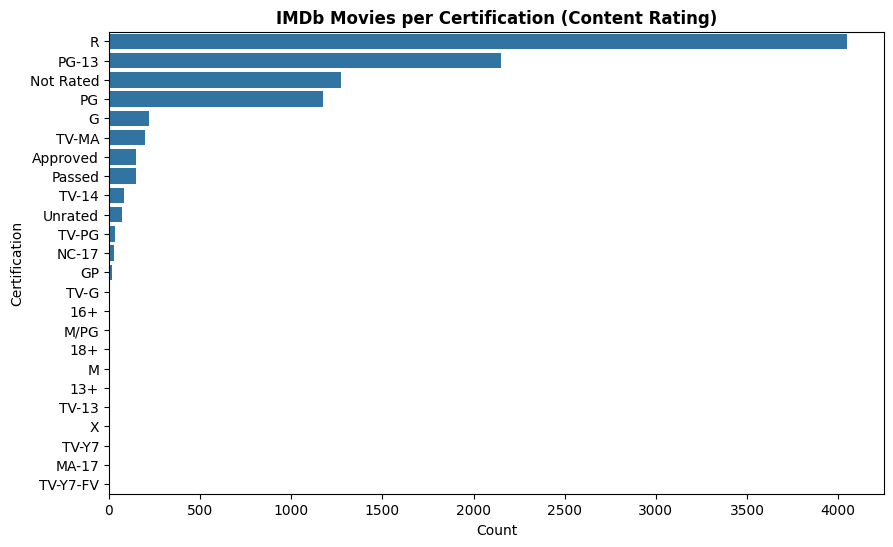

In [291]:
# get counts of movie ratings (certification)
cert_count = movies_df['Certification'].value_counts().reset_index()

# graph
fig = plt.figure(figsize=(10,6))

sns.barplot(x = 'count', y = 'Certification', data=cert_count)
plt.xlabel('Count')
plt.title('IMDb Movies per Certification (Content Rating)', fontweight='bold')

plt.show()

R-rated and PG-13 movies make up more than half the movies in the dataset.

**How many combinations of genres are there?**

In [292]:
print(f"There are {len(movies_df['Genre'].unique())} combinations of genres in the dataset")

There are 425 combinations of genres in the dataset


**What is the distribution of ratings? MetaScore? Gross revenue?**

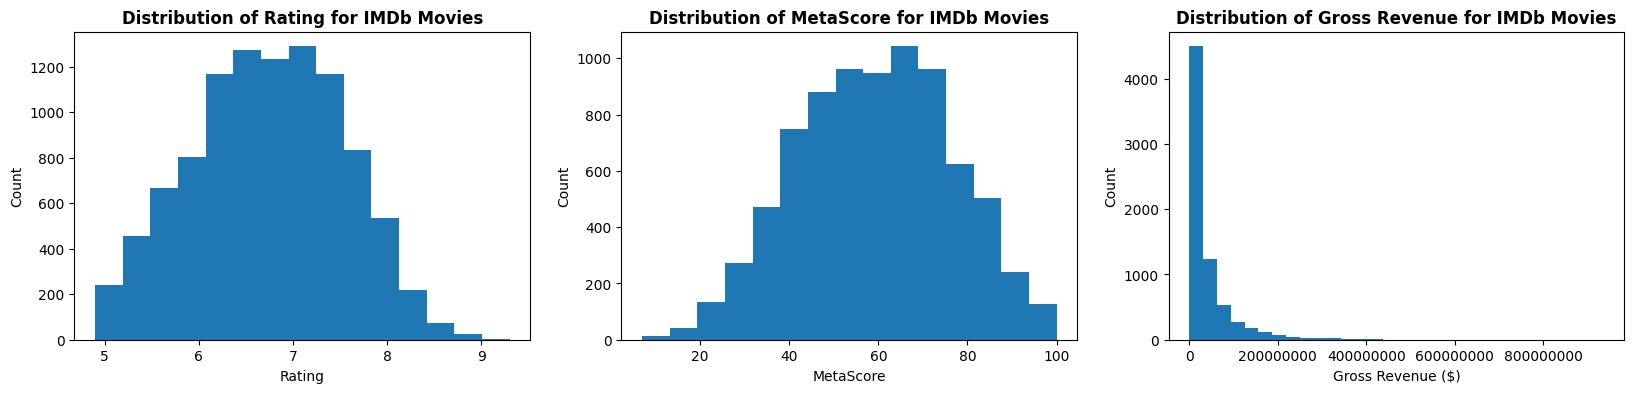

In [293]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20,4))

ax[0].hist(x = movies_df['Movie Rating'], bins=15)
ax[0].ticklabel_format(style='plain', axis='both')
ax[0].set_title('Distribution of Rating for IMDb Movies', fontweight='bold')
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Count')

ax[1].hist(x = movies_df['MetaScore'], bins=15)
ax[1].ticklabel_format(style='plain', axis='both')
ax[1].set_title('Distribution of MetaScore for IMDb Movies', fontweight='bold')
ax[1].set_xlabel('MetaScore')
ax[1].set_ylabel('Count')

ax[2].hist(x = movies_df['Gross'], bins=30)
ax[2].ticklabel_format(style='plain', axis='both')
ax[2].set_title('Distribution of Gross Revenue for IMDb Movies', fontweight='bold')
ax[2].set_xlabel('Gross Revenue ($)')
ax[2].set_ylabel('Count')

plt.show()

Ratings and MetaScores seem to be relatively normally distributed. Gross revenue is exponentially ditributed.

What are the top movies in the dataset?

Let's find the top 10 movies by various methods - highest rated, highest metascore, highest gross, highest voted.

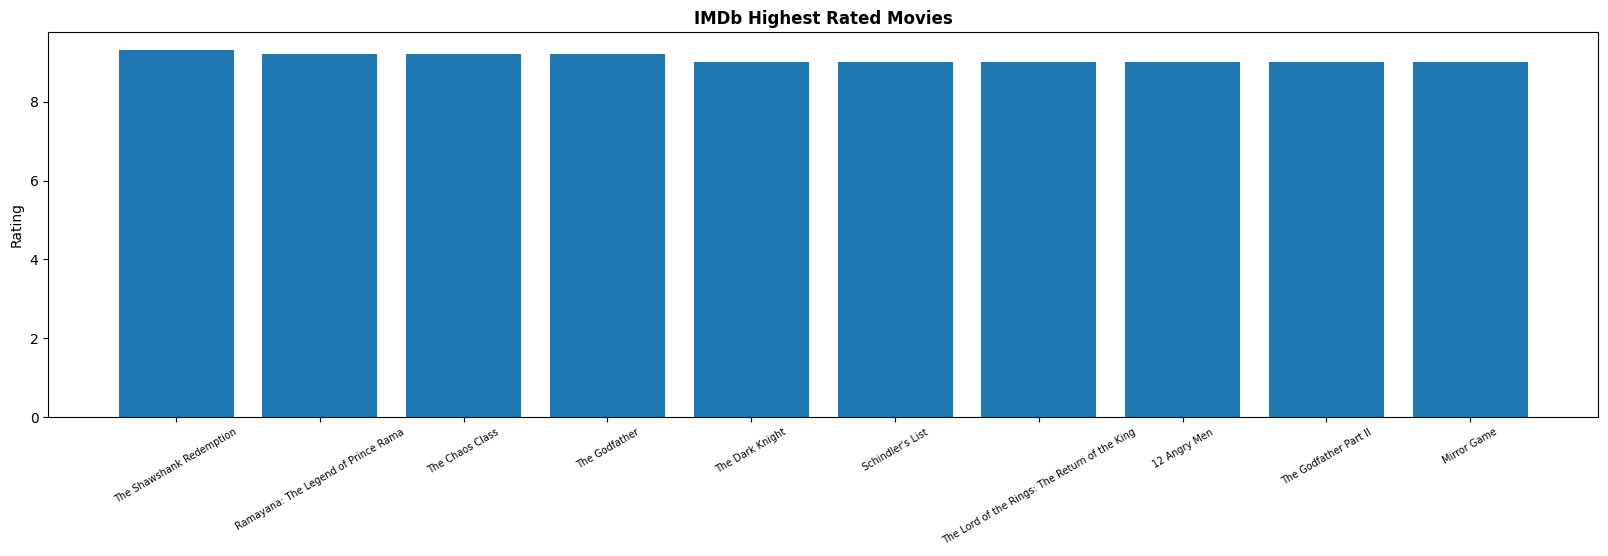

In [294]:
# top rated
top_rated = movies_df.sort_values('Movie Rating', ascending = False)

fig=plt.figure(figsize=(20,5))

plt.bar(x=top_rated['Movie Name'][:10], height=top_rated['Movie Rating'][:10])
plt.xticks(size=7, rotation=30)
plt.title('IMDb Highest Rated Movies', fontweight='bold')
plt.ylabel('Rating')

plt.show()

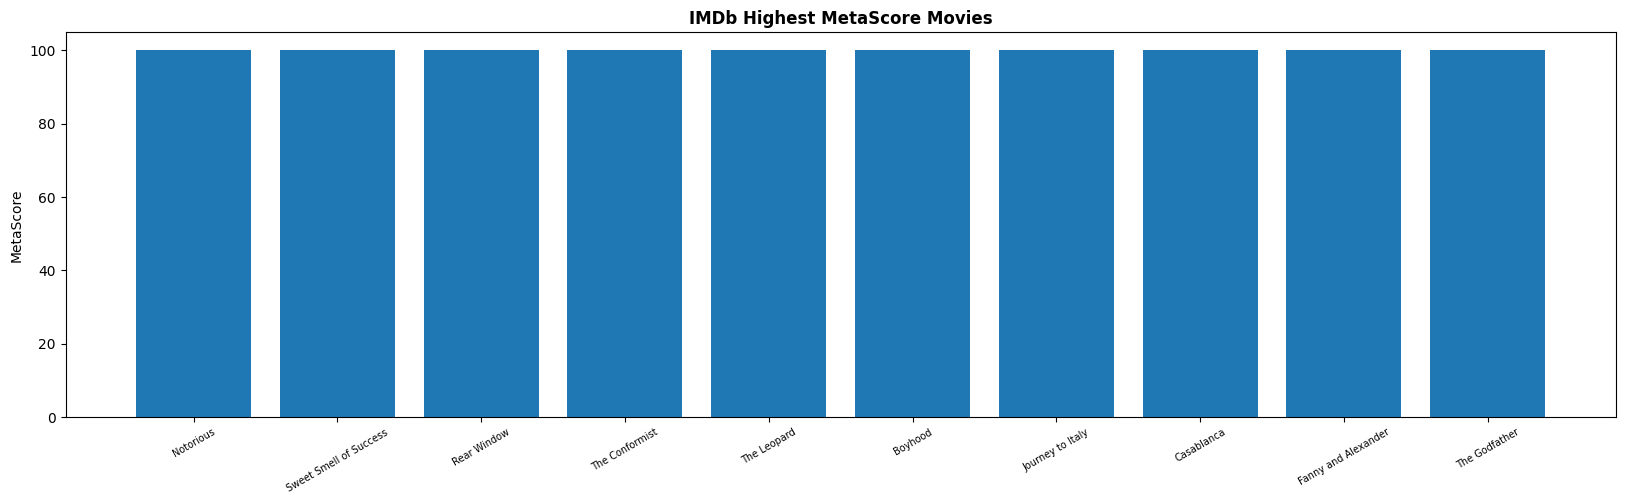

In [295]:
# top metascore
top_meta = movies_df.sort_values('MetaScore', ascending = False)

fig=plt.figure(figsize=(20,5))

plt.bar(x=top_meta['Movie Name'][:10], height=top_meta['MetaScore'][:10])
plt.xticks(size=7, rotation=30)
plt.title('IMDb Highest MetaScore Movies', fontweight='bold')
plt.ylabel('MetaScore')

plt.show()

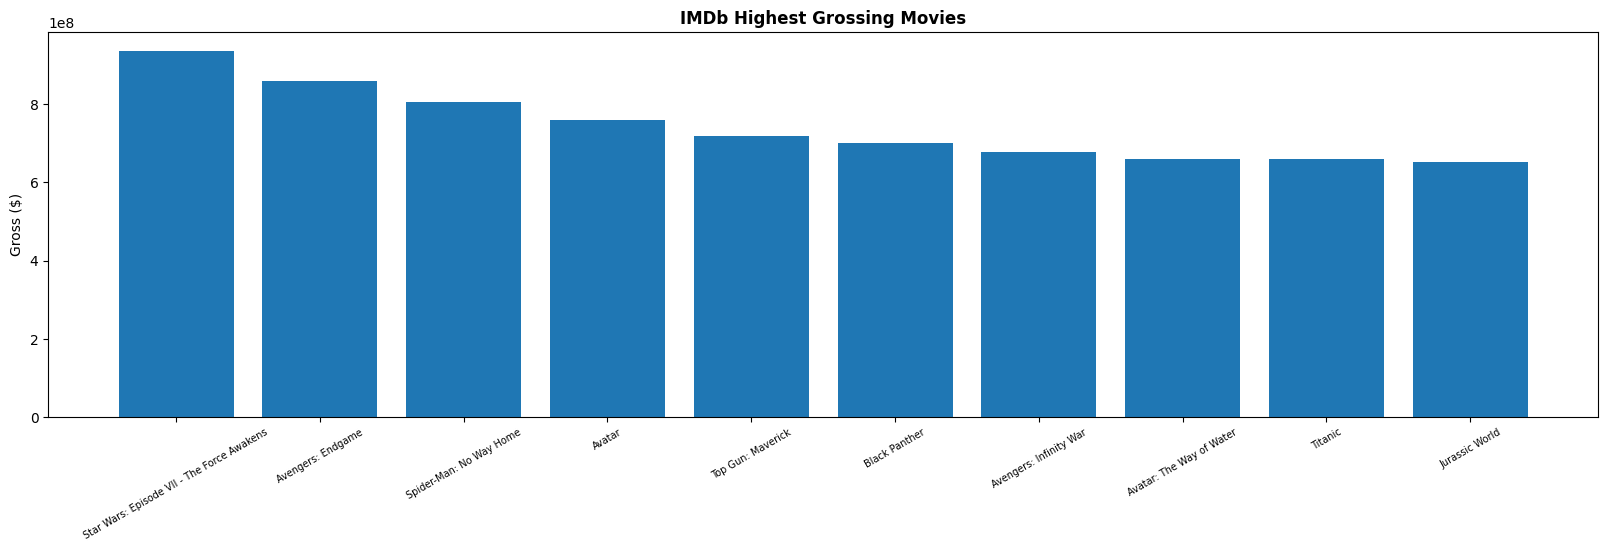

In [296]:
# highest gross
top_gross = movies_df.sort_values('Gross', ascending = False)

fig=plt.figure(figsize=(20,5))

plt.bar(x=top_gross['Movie Name'][:10], height=top_gross['Gross'][:10])
plt.xticks(size=7, rotation=30)
plt.title('IMDb Highest Grossing Movies', fontweight='bold')
plt.ylabel('Gross ($)')

plt.show()

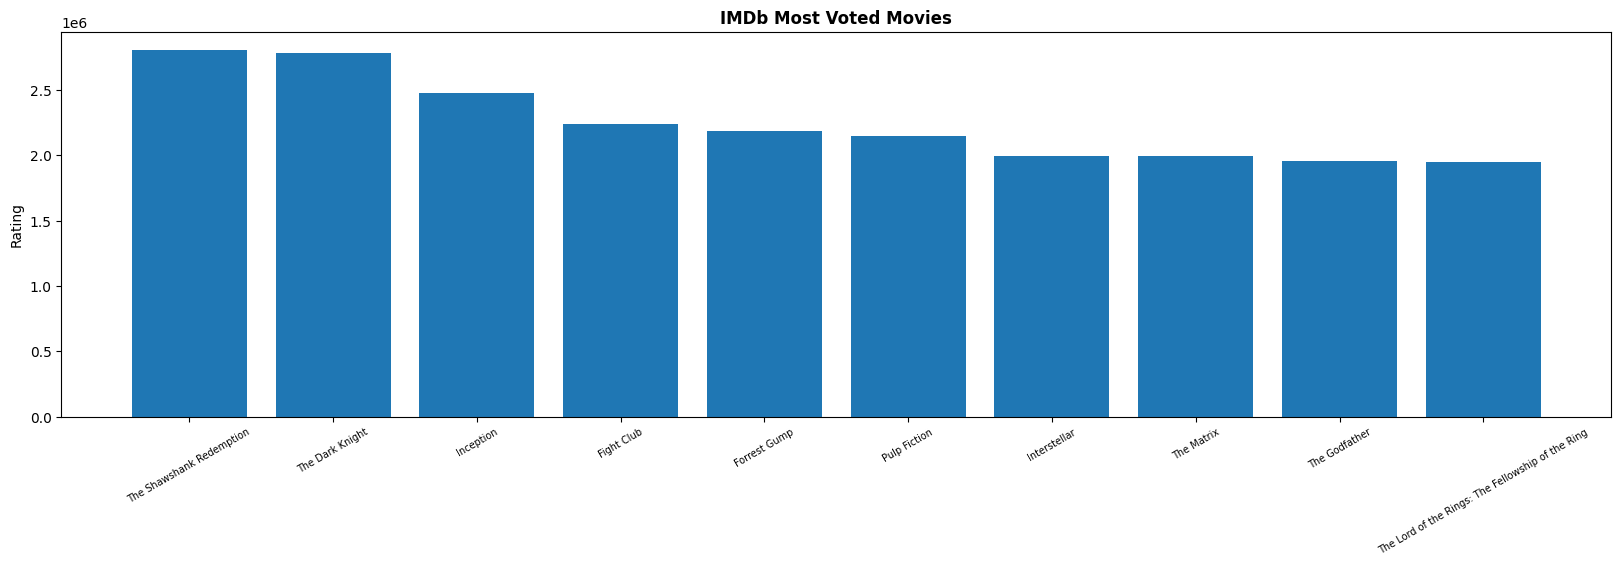

In [297]:
# top voted
top_voted = movies_df.sort_values('Votes', ascending = False)

fig=plt.figure(figsize=(20,5))

plt.bar(x=top_voted['Movie Name'][:10], height=top_voted['Votes'][:10])
plt.xticks(size=7, rotation=30)
plt.title('IMDb Most Voted Movies', fontweight='bold')
plt.ylabel('Rating')

plt.show()

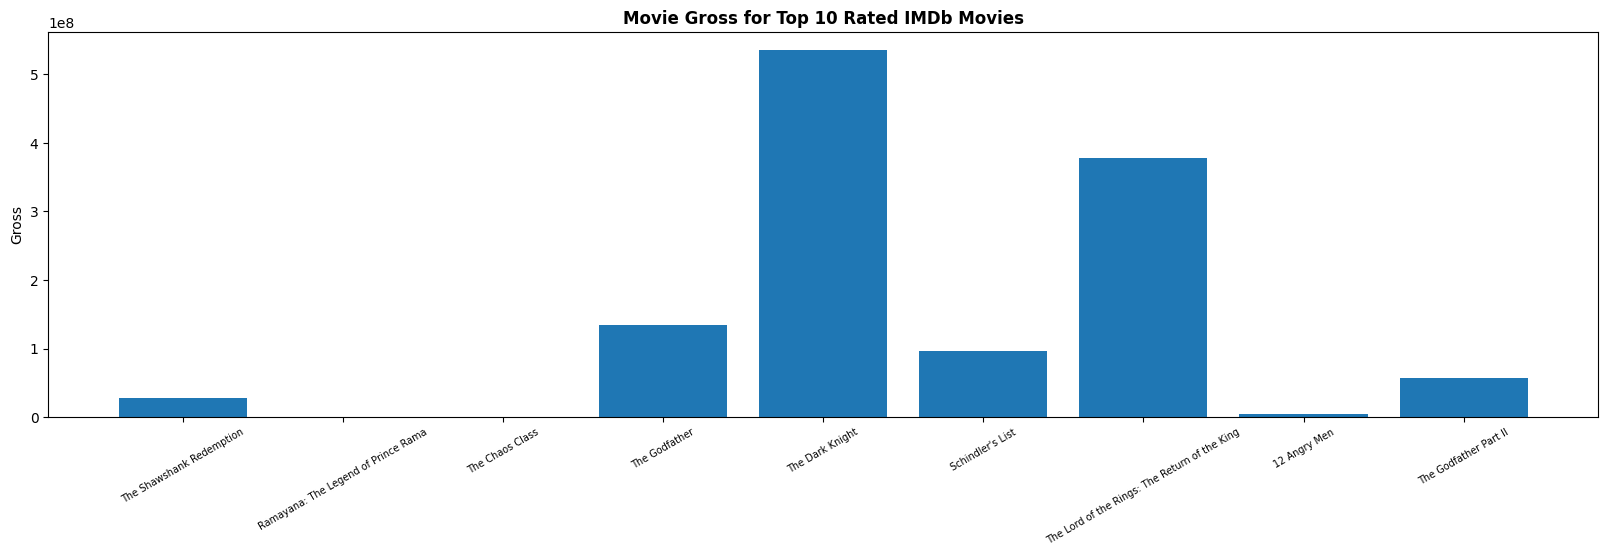

In [298]:
# gross of highest rated movies
top_rated = movies_df.sort_values('Movie Rating', ascending = False)

fig=plt.figure(figsize=(20,5))

plt.bar(x=top_rated['Movie Name'][:10], height=top_rated['Gross'][:10])
plt.xticks(size=7, rotation=30)
plt.title('Movie Gross for Top 10 Rated IMDb Movies', fontweight='bold')
plt.ylabel('Gross')

plt.show()

The top rated movies in the dataset do not necessarily have the highest grosses. 

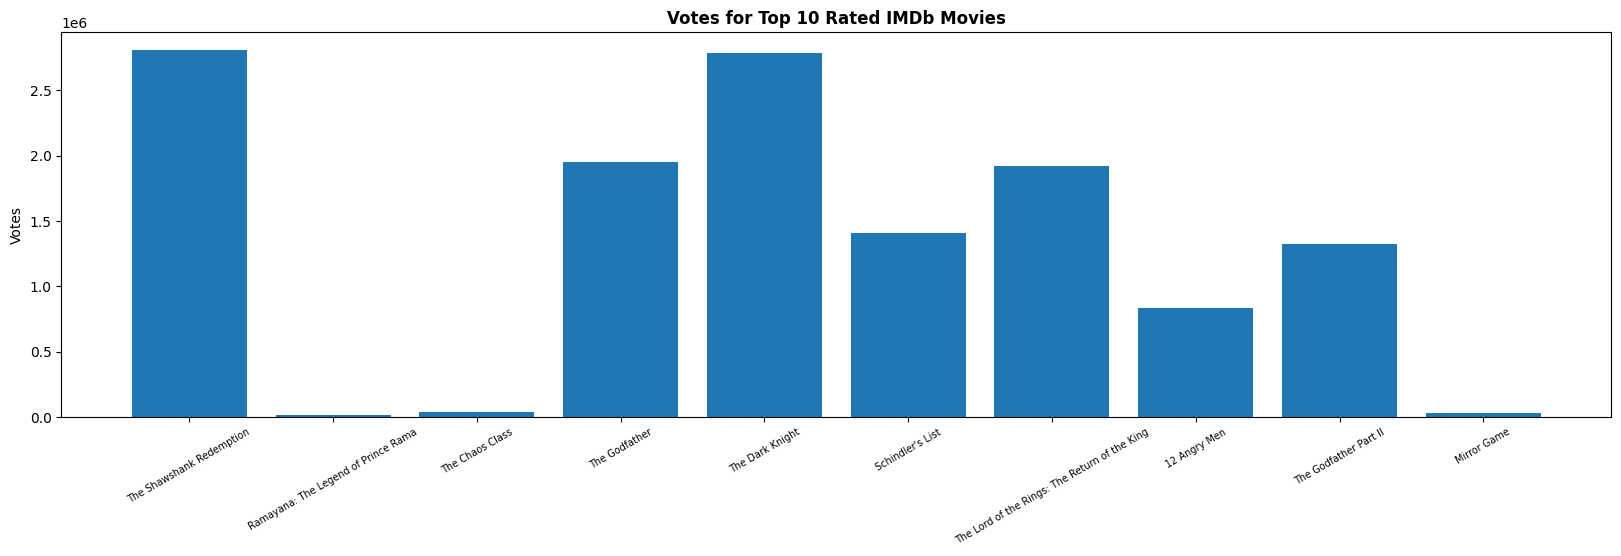

In [299]:
# vote count for highest rated movies
top_rated = movies_df.sort_values('Movie Rating', ascending = False)

fig=plt.figure(figsize=(20,5))

plt.bar(x=top_rated['Movie Name'][:10], height=top_rated['Votes'][:10])
plt.xticks(size=7, rotation=30)
plt.title('Votes for Top 10 Rated IMDb Movies', fontweight='bold')
plt.ylabel('Votes')

plt.show()

Some of the top rated movies have less than half the amount of votes of others. This may lead to an unfair advantage for these movies which allow them to appear in the "Top Rated" category. 

We will need to come up with a metric for an average rating based on the IMDb rating and the number of votes for that movie. 

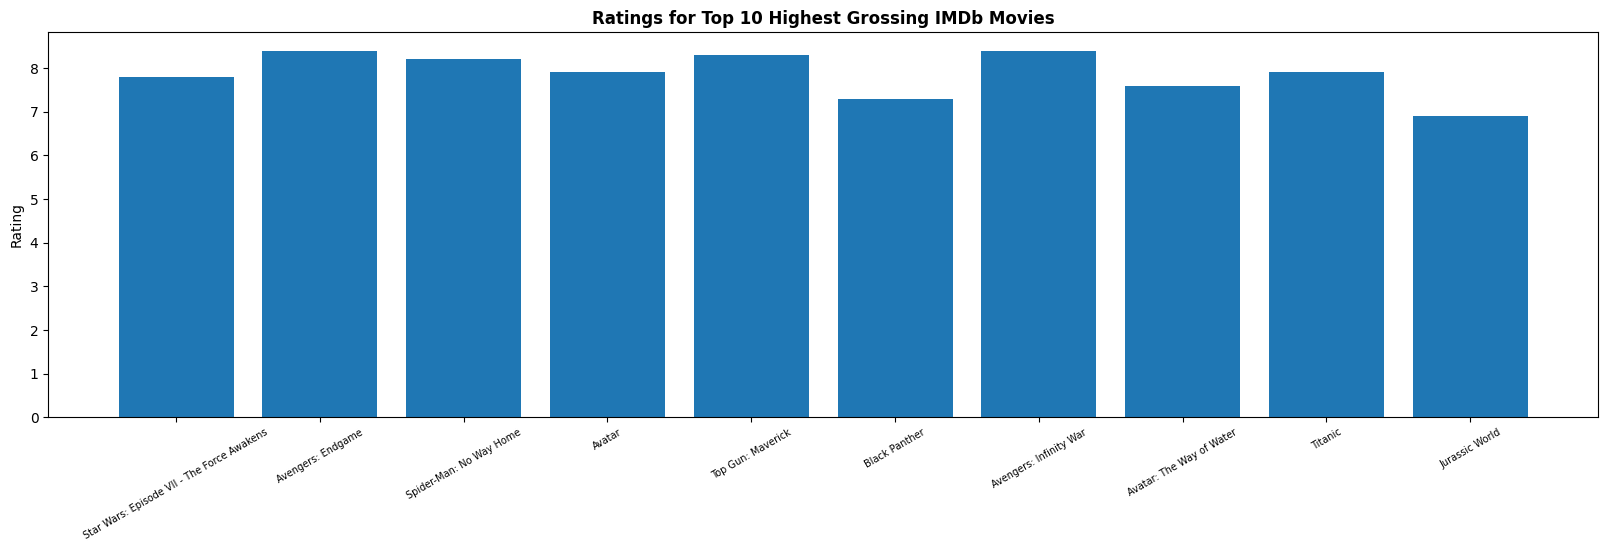

In [300]:
# ratings of highest grossing movies
top_gross = movies_df.sort_values('Gross', ascending = False)

fig=plt.figure(figsize=(20,5))

plt.bar(x=top_gross['Movie Name'][:10], height=top_gross['Movie Rating'][:10])
plt.xticks(size=7, rotation=30)
plt.title('Ratings for Top 10 Highest Grossing IMDb Movies', fontweight='bold')
plt.ylabel('Rating')

plt.show()

The ratings for the highest grossing movies are all quite high and all well above the average rating of 6.7.

### Data Wrangling

First, let's clean up some of the columns in the dataset. Specifically, the `Genre`, `Stars`, `Director`, and `Description` columns are all in the form of lists, but do not perform as such. We will turn the entries of these columns into lists for easier manipulation later on. Let's also rename the `Run Time in minutes` column.

In [301]:
# turn genre column into list
movies_df['Genre'] = movies_df['Genre'].apply(lambda x: x.strip('(\[|\]|\s*)').upper().replace(' ', '').replace("'", '').split(','))

# function to turn column into list
def convert_to_list(str_list):
    cleaned = re.sub("'", '', str_list)
    return cleaned.strip('(\[|\]|)').split(',')    # remove brackets and split on comma

# turn rest of list-like columns into lists
movies_df['Director'] = movies_df['Director'].apply(convert_to_list)
movies_df['Stars'] = movies_df['Stars'].apply(convert_to_list)
movies_df['Description'] = movies_df['Description'].apply(convert_to_list)

# rename Run Time in minutes
movies_df.rename({'Run Time in minutes': 'Runtime Mins'}, axis=1, inplace=True)

movies_df.head()

,Movie Name,Year of Release,Runtime Mins,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,[DRAMA],R,[Frank Darabont],"[Tim Robbins, Morgan Freeman, Bob Gunton, W...","[Over, the, course, of, several, years, ,..."
1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"[CRIME, DRAMA]",R,[Francis Ford Coppola],"[Marlon Brando, Al Pacino, James Caan, Dian...","[Don, Vito, Corleone, , head, of, a, maf..."
2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"[ANIMATION, ACTION, ADVENTURE]",PG,"[Ram Mohan, Yûgô Sakô, Koichi Saski]","[Arun Govil, Nikhil Kapoor, Edie Mirman, Ra...","[An, anime, adaptation, of, the, Hindu, ..."
3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"[COMEDY, DRAMA]",NaN,[Ertem Egilmez],"[Kemal Sunal, Münir Özkul, Halit Akçatepe, ...","[Lazy, , uneducated, students, share, a, ..."
4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"[ACTION, CRIME, DRAMA]",PG-13,[Christopher Nolan],"[Christian Bale, Heath Ledger, Aaron Eckhart...","[When, the, menace, known, as, the, Joke..."


In [302]:
# join description into string and remove all special characters
movies_df['Description'] = movies_df['Description'].apply(lambda x: ' '.join(x).lower())
movies_df.head()

,Movie Name,Year of Release,Runtime Mins,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,[DRAMA],R,[Frank Darabont],"[Tim Robbins, Morgan Freeman, Bob Gunton, W...",over the course of several years two c...
1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"[CRIME, DRAMA]",R,[Francis Ford Coppola],"[Marlon Brando, Al Pacino, James Caan, Dian...",don vito corleone head of a mafia fami...
2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"[ANIMATION, ACTION, ADVENTURE]",PG,"[Ram Mohan, Yûgô Sakô, Koichi Saski]","[Arun Govil, Nikhil Kapoor, Edie Mirman, Ra...",an anime adaptation of the hindu epic t...
3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"[COMEDY, DRAMA]",NaN,[Ertem Egilmez],"[Kemal Sunal, Münir Özkul, Halit Akçatepe, ...",lazy uneducated students share a very c...
4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"[ACTION, CRIME, DRAMA]",PG-13,[Christopher Nolan],"[Christian Bale, Heath Ledger, Aaron Eckhart...",when the menace known as the joker wrea...


Since there are some movies with the same titles (movies with a sequel of the same name or with a remake in another year), let's add the release year into the title for each movie.

In [303]:
# combine movie title and year into one column
movies_df['Movie Name'] = movies_df['Movie Name'] + ' (' + movies_df['Year of Release'].astype(str) +')'
movies_df.head()

,Movie Name,Year of Release,Runtime Mins,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,The Shawshank Redemption (1994),1994,142,9.3,2804443,82.0,28340000.0,[DRAMA],R,[Frank Darabont],"[Tim Robbins, Morgan Freeman, Bob Gunton, W...",over the course of several years two c...
1,The Godfather (1972),1972,175,9.2,1954174,100.0,134970000.0,"[CRIME, DRAMA]",R,[Francis Ford Coppola],"[Marlon Brando, Al Pacino, James Caan, Dian...",don vito corleone head of a mafia fami...
2,Ramayana: The Legend of Prince Rama (1993),1993,135,9.2,12995,NaN,NaN,"[ANIMATION, ACTION, ADVENTURE]",PG,"[Ram Mohan, Yûgô Sakô, Koichi Saski]","[Arun Govil, Nikhil Kapoor, Edie Mirman, Ra...",an anime adaptation of the hindu epic t...
3,The Chaos Class (1975),1975,87,9.2,42231,NaN,NaN,"[COMEDY, DRAMA]",NaN,[Ertem Egilmez],"[Kemal Sunal, Münir Özkul, Halit Akçatepe, ...",lazy uneducated students share a very c...
4,The Dark Knight (2008),2008,152,9.0,2786129,84.0,534860000.0,"[ACTION, CRIME, DRAMA]",PG-13,[Christopher Nolan],"[Christian Bale, Heath Ledger, Aaron Eckhart...",when the menace known as the joker wrea...


For any certification that is null, let's fill with "Not Rated."

In [304]:
movies_df['Certification'].fillna('Not Rated', inplace=True)

movies_df.head()

,Movie Name,Year of Release,Runtime Mins,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,The Shawshank Redemption (1994),1994,142,9.3,2804443,82.0,28340000.0,[DRAMA],R,[Frank Darabont],"[Tim Robbins, Morgan Freeman, Bob Gunton, W...",over the course of several years two c...
1,The Godfather (1972),1972,175,9.2,1954174,100.0,134970000.0,"[CRIME, DRAMA]",R,[Francis Ford Coppola],"[Marlon Brando, Al Pacino, James Caan, Dian...",don vito corleone head of a mafia fami...
2,Ramayana: The Legend of Prince Rama (1993),1993,135,9.2,12995,NaN,NaN,"[ANIMATION, ACTION, ADVENTURE]",PG,"[Ram Mohan, Yûgô Sakô, Koichi Saski]","[Arun Govil, Nikhil Kapoor, Edie Mirman, Ra...",an anime adaptation of the hindu epic t...
3,The Chaos Class (1975),1975,87,9.2,42231,NaN,NaN,"[COMEDY, DRAMA]",Not Rated,[Ertem Egilmez],"[Kemal Sunal, Münir Özkul, Halit Akçatepe, ...",lazy uneducated students share a very c...
4,The Dark Knight (2008),2008,152,9.0,2786129,84.0,534860000.0,"[ACTION, CRIME, DRAMA]",PG-13,[Christopher Nolan],"[Christian Bale, Heath Ledger, Aaron Eckhart...",when the menace known as the joker wrea...


For each movie, let's extract the main genre (the first appearing), the number of directors, and the number of stars.

In [305]:
movies_df['Main Genre'] = movies_df['Genre'].apply(lambda x: x[0])  # extract first genre as main genre
movies_df['Num Directors'] = movies_df['Director'].apply(lambda x: len(x))   # the number of directors
movies_df['Num Stars'] = movies_df['Stars'].apply(lambda x: len(x))   # the number of stars

movies_df.head()

,Movie Name,Year of Release,Runtime Mins,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description,Main Genre,Num Directors,Num Stars
0,The Shawshank Redemption (1994),1994,142,9.3,2804443,82.0,28340000.0,[DRAMA],R,[Frank Darabont],"[Tim Robbins, Morgan Freeman, Bob Gunton, W...",over the course of several years two c...,DRAMA,1,4
1,The Godfather (1972),1972,175,9.2,1954174,100.0,134970000.0,"[CRIME, DRAMA]",R,[Francis Ford Coppola],"[Marlon Brando, Al Pacino, James Caan, Dian...",don vito corleone head of a mafia fami...,CRIME,1,4
2,Ramayana: The Legend of Prince Rama (1993),1993,135,9.2,12995,NaN,NaN,"[ANIMATION, ACTION, ADVENTURE]",PG,"[Ram Mohan, Yûgô Sakô, Koichi Saski]","[Arun Govil, Nikhil Kapoor, Edie Mirman, Ra...",an anime adaptation of the hindu epic t...,ANIMATION,3,4
3,The Chaos Class (1975),1975,87,9.2,42231,NaN,NaN,"[COMEDY, DRAMA]",Not Rated,[Ertem Egilmez],"[Kemal Sunal, Münir Özkul, Halit Akçatepe, ...",lazy uneducated students share a very c...,COMEDY,1,4
4,The Dark Knight (2008),2008,152,9.0,2786129,84.0,534860000.0,"[ACTION, CRIME, DRAMA]",PG-13,[Christopher Nolan],"[Christian Bale, Heath Ledger, Aaron Eckhart...",when the menace known as the joker wrea...,ACTION,1,4


Let's turn the genres and certifications into dummy variables for modeling purposes. 

In [306]:
# create dataset for dummy genres
dummy_genres = movies_df.explode('Genre', ',')
dummy_genres['Genre Dummy'] = 1     # 1 if genre applies to movie
dummy_genres = dummy_genres.pivot_table(index='Movie Name', columns='Genre', values='Genre Dummy').reset_index()
dummy_genres.fillna(0, inplace=True)    # fill NA with 0 - genre doesn't apply

dummy_genres.head()

Genre,Movie Name,ACTION,ADVENTURE,ANIMATION,BIOGRAPHY,COMEDY,CRIME,DRAMA,FAMILY,FANTASY,...,HORROR,MUSIC,MUSICAL,MYSTERY,ROMANCE,SCI-FI,SPORT,THRILLER,WAR,WESTERN
0,#Alive (2020),1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,#Home (2021),0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,'71 (2014),1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,'83 (2021),0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,(T)Raumschiff Surprise - Periode 1 (2004),0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [307]:
# create dataset for dummy certifications
dummy_certs = movies_df
dummy_certs['Cert Dummy'] = 1     # 1 if genre applies to movie
dummy_certs = dummy_certs.pivot_table(index='Movie Name', columns='Certification', values='Cert Dummy').reset_index()
dummy_certs.fillna(0, inplace=True)    # fill NA with 0 - genre doesn't apply

dummy_certs.head()

Certification,Movie Name,13+,16+,18+,Approved,G,GP,M,M/PG,MA-17,...,R,TV-13,TV-14,TV-G,TV-MA,TV-PG,TV-Y7,TV-Y7-FV,Unrated,X
0,#Alive (2020),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,#Home (2021),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,'83 (2021),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,(T)Raumschiff Surprise - Periode 1 (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [308]:
# join dummy dfs to main movies df
full = pd.merge(movies_df, dummy_genres, how='left', on='Movie Name')
full = pd.merge(full, dummy_certs, how='left', on='Movie Name')

full.head()

,Movie Name,Year of Release,Runtime Mins,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,...,R,TV-13,TV-14,TV-G,TV-MA,TV-PG,TV-Y7,TV-Y7-FV,Unrated,X
0,The Shawshank Redemption (1994),1994,142,9.3,2804443,82.0,28340000.0,[DRAMA],R,[Frank Darabont],...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,The Godfather (1972),1972,175,9.2,1954174,100.0,134970000.0,"[CRIME, DRAMA]",R,[Francis Ford Coppola],...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ramayana: The Legend of Prince Rama (1993),1993,135,9.2,12995,NaN,NaN,"[ANIMATION, ACTION, ADVENTURE]",PG,"[Ram Mohan, Yûgô Sakô, Koichi Saski]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,The Chaos Class (1975),1975,87,9.2,42231,NaN,NaN,"[COMEDY, DRAMA]",Not Rated,[Ertem Egilmez],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,The Dark Knight (2008),2008,152,9.0,2786129,84.0,534860000.0,"[ACTION, CRIME, DRAMA]",PG-13,[Christopher Nolan],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Analysis

Let's examine the correlation between different numerical features and the movie rating. 

In [309]:
numeric_features = movies_df[['Year of Release', 'Runtime Mins', 'Votes', 'MetaScore', 'Gross', 'Num Directors', 'Num Stars', 'Movie Rating']]
numeric_features.head()

,Year of Release,Runtime Mins,Votes,MetaScore,Gross,Num Directors,Num Stars,Movie Rating
0,1994,142,2804443,82.0,28340000.0,1,4,9.3
1,1972,175,1954174,100.0,134970000.0,1,4,9.2
2,1993,135,12995,NaN,NaN,3,4,9.2
3,1975,87,42231,NaN,NaN,1,4,9.2
4,2008,152,2786129,84.0,534860000.0,1,4,9.0


<Axes: >

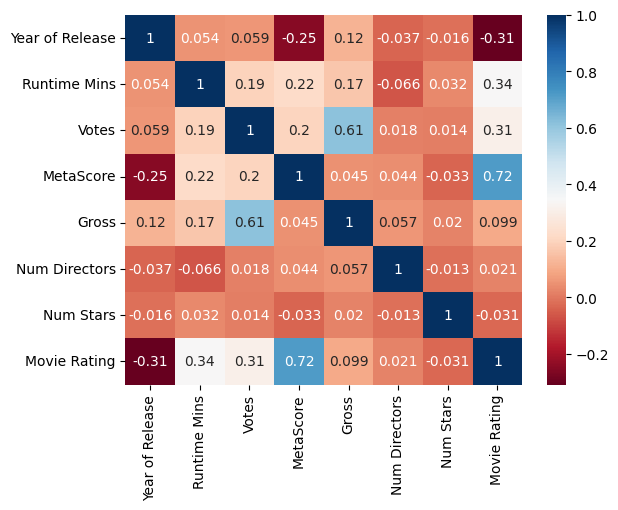

In [310]:
corr = numeric_features.corr()

sns.heatmap(corr, annot=True, cmap='RdBu')

- There is a large positive correlation between `MetaScore` and `Movie Rating`. 
- There is a slight positive correlation between `Runtime Mins` and `Movie Rating`, `Votes` and `Movie Rating`.
- There is a very small positive correlation between `Gross` and `Movie Rating`.
- There is a slight negative correlation between `Year of Release` and `Movie Rating`.

It makes sense that movie ratings should be highly correlated with MetaScore as these are both ways of ranking the movies based on either rating or critic reviews. 

The slight positive correlation between movie length and movie rating seems to indicate that longer movies have higher ratings. Likewise, the slight positive correlation between movie votes and movie rating seems to indicate that movies with more votes have higher ratings. This makes sense as movies that are rated by more people are probably watched by more people which is a clear indication of popularity.


**Which genres are most popular?**

The dataset is comprised of the top 10,000 movies on IMDb. In order to determine the most popular genres, let's see which genres appear the most within the dataset.

In [311]:
genres_count = movies_df.explode('Genre', ',')['Genre'].value_counts().reset_index()
genres_count

,Genre,count
0,DRAMA,5885
1,COMEDY,3624
2,ACTION,2491
3,CRIME,2103
4,ROMANCE,1748
5,ADVENTURE,1674
6,THRILLER,1663
7,HORROR,1210
8,MYSTERY,1092
9,FANTASY,717


The top 10 genres which appear the most in the dataset are drama, comedy, action, crime, adventure, romance, thriller, horror, mystery, and fantasy.

Let's compare the rating for these top genres.

In [312]:
# list of top 10 genres
top_10_genres = genres_count['Genre'][:10].tolist()

# average rating for genres
filtered_df = movies_df[movies_df['Main Genre'].apply(lambda x: any(genre in x for genre in top_10_genres))]
filtered_df.groupby('Main Genre')['Movie Rating'].mean().reset_index().sort_values('Movie Rating', ascending = False)

,Main Genre,Movie Rating
8,ROMANCE,7.160000
4,DRAMA,6.990113
3,CRIME,6.966341
7,MYSTERY,6.760000
1,ADVENTURE,6.732044
2,COMEDY,6.611010
0,ACTION,6.533135
9,THRILLER,6.310526
6,HORROR,6.121784
5,FANTASY,6.076271


Romance movies are the highest rated, followed by mystery, drama, and crime which are all pretty similarly rated. 

Let's take a look at the distributions of the ratings for each of the top 10 genres.

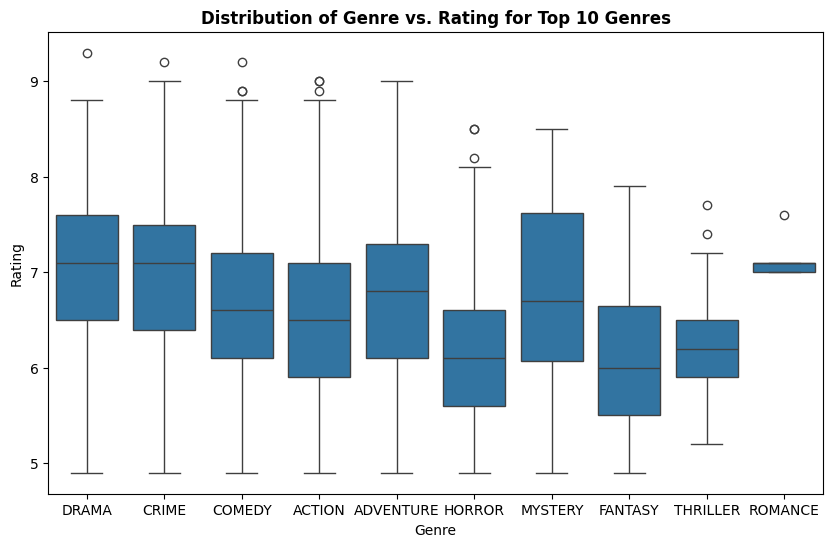

In [313]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='Main Genre', y='Movie Rating', data=filtered_df)
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('Distribution of Genre vs. Rating for Top 10 Genres', fontweight='bold')

plt.show()

- Ratings for romance movies are centere around 7 and it seems all romance movies are rated pretty similarly. 
- Thriller movies are also rated pretty similarly, with three outliers, two where a thriller was rated more highly and one where it was rated less. 
- Fantasy movies are rated lower than other genres.
- Drama and crime movies are rated practically the same. Likewise with action and comedy.

Now let's see what the average rating for movies is based on certification. 

In [314]:
filtered_df.groupby('Certification')['Movie Rating'].mean().reset_index().sort_values('Movie Rating', ascending = False)

,Certification,Movie Rating
15,TV-13,8.350000
1,16+,7.700000
2,18+,7.600000
13,Passed,7.598571
6,M,7.533333
5,GP,7.435714
20,TV-Y7,7.400000
3,Approved,7.374815
7,M/PG,7.350000
22,X,7.200000


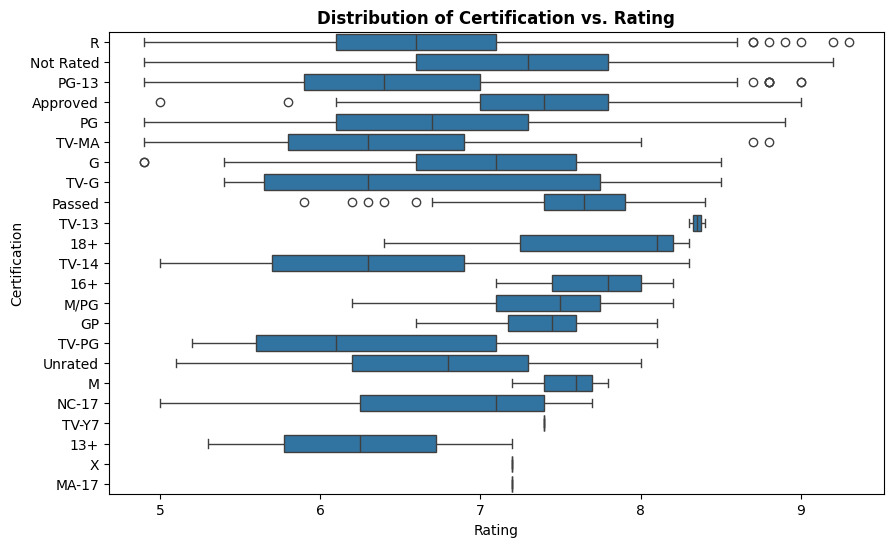

In [315]:
plt.figure(figsize=(10, 6))

sns.boxplot(y='Certification', x='Movie Rating', data=filtered_df)
plt.ylabel('Certification')
plt.xlabel('Rating')
plt.title('Distribution of Certification vs. Rating', fontweight='bold')

plt.show()

Let's see if we can come up with a model to predict movie ratings based on the release year, movie length, number of votes, genre, and certification. 

In [326]:
variables = full[['Movie Rating', 'Year of Release', 'Runtime Mins', 'Votes', 
       'ACTION', 'ADVENTURE', 'ANIMATION', 'BIOGRAPHY', 'COMEDY', 'CRIME', 'DRAMA', 
       'FAMILY', 'FANTASY', 'FILM-NOIR', 'HISTORY', 'HORROR', 'MUSIC', 'MUSICAL', 
       'MYSTERY', 'ROMANCE', 'SCI-FI', 'SPORT', 'THRILLER', 'WAR', 'WESTERN',
       '13+', '16+', '18+', 'Approved', 'G', 'GP', 'M', 'M/PG', 'MA-17',
       'NC-17', 'Not Rated', 'PG', 'PG-13', 'Passed', 'R', 'TV-13', 'TV-14',
       'TV-G', 'TV-MA', 'TV-PG', 'TV-Y7', 'TV-Y7-FV', 'Unrated', 'X']]

import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error

# define X, y and split into train:test data
X = variables.drop(columns=['Movie Rating']).values
y = variables['Movie Rating'].values
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=23)

# initiate and fit model
model = lm.LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# check accuracy
r2 = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')

R-squared: 0.4671394895179628
Mean Squared Error: 0.3639993450869121


Based on the $R^2$ and the mean squared error, this model may have some explanatory power. The model accounts for approximately 47% of the variability in `Movie Rating` and, on average, is about 0.6 off from the actual rating of the movie. 

Further information could be added to the model, such as demographic and user information, to possibly improve the model. However, we do not have this information.

### Basic Recommender

IMDb ratings are weighted based on user authenticity. They have another rating system which they use to determine top movies, specifically implemented in their "Top 250" page.

The formula is as follows: 

$ WR = \frac{v}{v+m} * R + \frac{m}{v+m} * C $

where: 

- R = average rating for movie
- v = number of votes for movie
- m = minimum votes to be listed in Top 250 (25,000 votes)
- C = mean vote across dataset

Let's come up with a function to calculate the weighted rating for each movie. 

In [317]:
def weighted_rating(df, m=25000):
    R = df['Movie Rating']
    v = df['Votes']
    C = df['Movie Rating'].mean()

    return (v/(v+m) * R) + (m/(v+m) * C)

Now let's apply this to create a weighted rating column. 

In [318]:
movies_df['Weighted Rating'] = round(weighted_rating(movies_df), 1)
movies_df.head()

,Movie Name,Year of Release,Runtime Mins,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description,Main Genre,Num Directors,Num Stars,Cert Dummy,Weighted Rating
0,The Shawshank Redemption (1994),1994,142,9.3,2804443,82.0,28340000.0,[DRAMA],R,[Frank Darabont],"[Tim Robbins, Morgan Freeman, Bob Gunton, W...",over the course of several years two c...,DRAMA,1,4,1,9.3
1,The Godfather (1972),1972,175,9.2,1954174,100.0,134970000.0,"[CRIME, DRAMA]",R,[Francis Ford Coppola],"[Marlon Brando, Al Pacino, James Caan, Dian...",don vito corleone head of a mafia fami...,CRIME,1,4,1,9.2
2,Ramayana: The Legend of Prince Rama (1993),1993,135,9.2,12995,NaN,NaN,"[ANIMATION, ACTION, ADVENTURE]",PG,"[Ram Mohan, Yûgô Sakô, Koichi Saski]","[Arun Govil, Nikhil Kapoor, Edie Mirman, Ra...",an anime adaptation of the hindu epic t...,ANIMATION,3,4,1,7.6
3,The Chaos Class (1975),1975,87,9.2,42231,NaN,NaN,"[COMEDY, DRAMA]",Not Rated,[Ertem Egilmez],"[Kemal Sunal, Münir Özkul, Halit Akçatepe, ...",lazy uneducated students share a very c...,COMEDY,1,4,1,8.3
4,The Dark Knight (2008),2008,152,9.0,2786129,84.0,534860000.0,"[ACTION, CRIME, DRAMA]",PG-13,[Christopher Nolan],"[Christian Bale, Heath Ledger, Aaron Eckhart...",when the menace known as the joker wrea...,ACTION,1,4,1,9.0


Now let's print the top movies for each genre. Since there are a lot of genres, let's print out the top 5 movies for the top 10 most occuring genres that we found above.

In [319]:
# function to get the top five movies based on weighted rating
def get_top_5(df):
    sorted = df.sort_values('Weighted Rating')
    top_5 = sorted[:5]
    return '\n'.join(top_5['Movie Name'].tolist())

# get top five movies from each genre
for genre in top_10_genres:
    genre_df = movies_df[movies_df['Main Genre'] == genre]
    print(f'{genre}:') 
    print(f'{get_top_5(genre_df)}\n')

DRAMA:
Twilight (2008)
Showgirls (1995)
Rocky V (1990)
The Circle (2017)
Flatliners (2017)

COMEDY:
Year One (2009)
The Flintstones (1994)
Scary Movie 4 (2006)
Sex Tape (2014)
High School Musical 3: Senior Year (2008)

ACTION:
Wild Wild West (1999)
The Twilight Saga: Eclipse (2010)
Anaconda (1997)
Charlie's Angels: Full Throttle (2003)
Transformers: The Last Knight (2017)

CRIME:
Knock Knock (2015)
Spring Breakers (2012)
A Nightmare on Elm Street (2010)
The Snowman (2017)
Spiral (2021)

ROMANCE:
Eye of the Needle (1981)
He Loves Me, He Loves Me Not (2002)
Starman (1984)
How the West Was Won (1962)
Shiddat (2021)

ADVENTURE:
The Twilight Saga: Breaking Dawn - Part 1 (2011)
The Happening (2008)
Gulliver's Travels (2010)
Honey, I Blew Up the Kid (1992)
Herbie Fully Loaded (2005)

THRILLER:
Exit 0 (2019)
Till Death (2021)
Fatale (2020)
Beyond the Reach (2014)
A Fall from Grace (2020)

HORROR:
Silent Hill: Revelation (2012)
The Final Destination (2009)
Poltergeist (2015)
Chernobyl Diaries (

This is a basic recommender which recommends movies based on their weighted rating. You can filter by different features to get top movies catered to your specifications. 

### Content Based Recommender

Let's first create a content-based recommender using the description, genres, and other production information. First, let's create a column which combines all of the information. 

In [320]:
# function to unlist list
def unlist(person_list):
    person_str = ''
    for person in person_list:
        person_str += re.sub(' ', '', person).lower() + ' ' # combine multiple words and lowercase
    return person_str.strip()
        
movies_df['Directors Unlisted'] = movies_df['Director'].apply(unlist)
movies_df['Stars Unlisted'] = movies_df['Stars'].apply(unlist)
movies_df['Genres Unlisted'] = movies_df['Genre'].apply(unlist)

# combine features
movies_df['Content'] = movies_df['Description'] + ' ' + movies_df['Directors Unlisted'] + ' ' + movies_df['Stars Unlisted'] + ' ' + movies_df['Genres Unlisted']


Now let's vectorize this information. 

In [321]:
# import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

# make TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(movies_df['Content'])

We will use cosine simlarity scores to compare the similarities between descriptions. 

In [322]:
# import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [323]:
# reverse map of indices and movie titles
indices = pd.Series(movies_df.index, index=movies_df['Movie Name'])

In [324]:
# function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    index = indices[title]  # get index of movie
    sim_scores = list(enumerate(cosine_sim[index])) # get similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)   # sort based on similarity scores
    sim_scores = sim_scores[1:11]   # scores of 10 most similar movies
    movie_indices = [i[0] for i in sim_scores]  # movie indices for similar movies
    return movies_df['Movie Name'].iloc[movie_indices]  # return top 10 similar movies

In [325]:
get_recommendations('X-Men: Days of Future Past (2014)')

2460                                         X-Men (2000)
2143                                            X2 (2003)
5008                                 The Wolverine (2013)
350                                          Logan (2017)
4180                             X-Men: Apocalypse (2016)
5448                         X-Men: The Last Stand (2006)
6       The Lord of the Rings: The Return of the King ...
5145                                     Apt Pupil (1998)
5884                      X-Men Origins: Wolverine (2009)
8649                                  Dark Phoenix (2019)
Name: Movie Name, dtype: object

### Conclusion

This analysis of IMDb movie data provides insights into some of the factors determining movie popularity and ratings. Through exploratory data analysis, we identified the top genres, with romance movies emerging as the highest rated, closely followed by mystery, drama, and crime. The distribution of ratings for different genres was visualized, revealing interesting patterns and variations. The correlation analysis highlighted factors such as movie length and the number of votes, indicating their influence on higher ratings. A model was created to predict movie rating based on release year, movie length, genre, and certification. The model accounted for 47% of the variation in the data and had a relatively high mean square error but could be improved using other demographic or user information which was not sourced for this project. 

A basic recommender system was implemented to suggest movies based on highest weighted rating and a content based recommender system was implemented to suggest movies based on previously watched movies. 

In conclusion, this project provides a comprehensive exploration of IMDb movie data, offering valuable insights for movie enthusiasts, analysts, and industry professionals. The findings contribute to a deeper understanding of the dynamics that drive movie ratings and popularity on the IMDb platform.


### Additional Resources:

- IMDb weighted rating: https://www.quora.com/How-does-IMDbs-rating-system-work
- Recommender systems tutorial: https://www.datacamp.com/tutorial/recommender-systems-python